# **Wine Quality Classification - Logistic Regression**

-----------------------------
## **Context**
-----------------------------

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are much more normal wines than excellent or poor ones). https://archive.ics.uci.edu/ml/datasets/wine+quality , I


In this workbook, we will continue from the EDA analysis and build a logistic regression model to classify the quality of wine.

Logistic Regression is a classifier which models the underlying probability of the variable by fitting a sigmoid curve. It is a linear classifier which can be sensitivie to outliers. Regularization techniques can be applied (L1 or L2) to prevent the model from overfitting.

To score the model, we will look at the confusion matrix and accuracy score, which are standard classification scoring methods.

Before we proceed, lets define a wine to be 'good' if its quality is >6.

-----------------------------
## **Dataset** 
-----------------------------
Input variables (based on physicochemical tests):

1 - fixed acidity

2 - volatile acidity

3 - citric acid

4 - residual sugar

5 - chlorides

6 - free sulfur dioxide

7 - total sulfur dioxide

8 - density

9 - pH

10 - sulphates

11 - alcohol

Output variable (based on sensory data):

12 - quality (score between 0 and 10)

## Step 1 - Import the Libraries and dataset

In [3]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import sklearn
scale=StandardScaler()
lr=LinearRegression()
ridge=Ridge()
logmodel=LogisticRegression()

In [4]:
#imprt dataset
df=pd.read_csv('/Users/guransingh/Library/CloudStorage/OneDrive-Personal/Documents/Work/Python Notebooks/Python Notebooks/Winequality/winequality-red.csv')

### EDA observations
quality is +ve corr with alc,citric acid, sulphates  
quality is -ve corr with volatile acidity

volatile acidity and citric acid are correlated  
fixed acidity is correlated with citric acid, density and pH

In [5]:
# Examine the dataset
df.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5


In [7]:
#create function to create target variable 0 or 1 if quality > 6
def goodwine(row):
    if row['quality']>6:
        return 1
    else:
        return 0

In [8]:
#apply the function
df['goodwine']=df.apply(goodwine,axis=1)

In [9]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,goodwine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


## Step 2 - split into x and y variables

In [10]:
#We will use all the inputs as x variables, and 'goodwine' as the Y Variable
x=df.drop(['goodwine','quality'],axis=1)
y=df['goodwine']

In [11]:
x.head(2)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.0,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.0,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8


In [12]:
x.shape

(1599, 11)

In [13]:
y.head(2)

0    0
1    0
Name: goodwine, dtype: int64

In [14]:
y.value_counts()

0    1382
1     217
Name: goodwine, dtype: int64

The dataset is unbalanced. There are a lot more bad wines than good ones

## Step 3 - Train test split

In [15]:
#Split the data into train and tests. The data should be split before standardization as the test data should be un processed
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=1)

In [16]:
#check means and stds
print(x_train.mean())
print(x_train.std())
print(y_train.mean())
print(y_train.std())

fixed acidity            8.316847
volatile acidity         0.531560
citric acid              0.268182
residual sugar           2.528565
chlorides                0.087249
free sulfur dioxide     15.690158
total sulfur dioxide    45.772310
density                  0.996743
pH                       3.314746
sulphates                0.658090
alcohol                 10.442494
dtype: float64
fixed acidity            1.791149
volatile acidity         0.179228
citric acid              0.198520
residual sugar           1.329996
chlorides                0.046479
free sulfur dioxide     10.338537
total sulfur dioxide    32.406438
density                  0.001914
pH                       0.157410
sulphates                0.168955
alcohol                  1.073567
dtype: float64
0.14345287739783152
0.35068036077320974


## Step 4 - Standardize the data

In [17]:
#standardize data into standard normal
#x_train=scale.fit_transform(x_train)

In [18]:
#check if mean = 0, std = 1
print(x_train.mean())
print(x_train.std())

fixed acidity            8.316847
volatile acidity         0.531560
citric acid              0.268182
residual sugar           2.528565
chlorides                0.087249
free sulfur dioxide     15.690158
total sulfur dioxide    45.772310
density                  0.996743
pH                       3.314746
sulphates                0.658090
alcohol                 10.442494
dtype: float64
fixed acidity            1.791149
volatile acidity         0.179228
citric acid              0.198520
residual sugar           1.329996
chlorides                0.046479
free sulfur dioxide     10.338537
total sulfur dioxide    32.406438
density                  0.001914
pH                       0.157410
sulphates                0.168955
alcohol                  1.073567
dtype: float64


## Step 5 - Fit the logistic Regression Model

In [19]:
#set max iterations to 5000 or they might be an error
logmodel=LogisticRegression(max_iter=5000)

In [20]:
#fit the model on x train and y train
logmodel.fit(x_train,y_train)

LogisticRegression(max_iter=5000)

In [21]:
#create predictions on x test
yhat=logmodel.predict(x_test)

In [22]:
#create predictions on x train too
yhattrain=logmodel.predict(x_train)

## Step 6 - Check Model fit on training and testing data

In [23]:
# check confusion matrix and accuracy score on test dataset
print(confusion_matrix(yhat,y_test))
print(accuracy_score(yhat,y_test))

[[345  30]
 [ 10  15]]
0.9


Text(0.5, 1.0, 'Test Dataset Confusion Matrix')

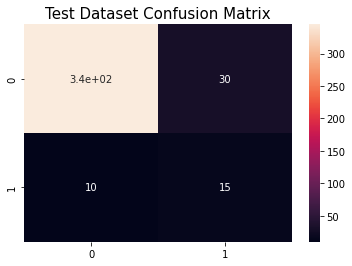

In [24]:
#plot heatmap of confusion matrix
sns.heatmap(confusion_matrix(yhat,y_test),annot=True)
plt.title('Test Dataset Confusion Matrix',fontsize=15)

In [25]:
# Check testing data score
print(confusion_matrix(yhattrain,y_train))
print(accuracy_score(yhattrain,y_train))

[[997 120]
 [ 30  52]]
0.8748957464553795


The train data score is actually less than test data, so it does not look like the model is overfitting. So no need to apply regularization technique for now.

Text(0.5, 1.0, 'Training Dataset Confusion Matrix')

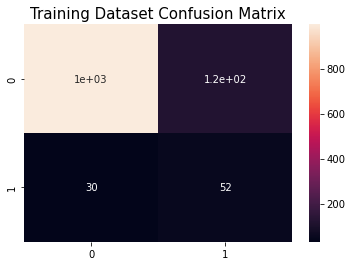

In [26]:
#plot heatmap of confusion matrix
sns.heatmap(confusion_matrix(yhattrain,y_train),annot=True)
plt.title('Training Dataset Confusion Matrix',fontsize=15)

Score on test dataset is higher than training dataset. So this is a high bias, low variance model (underfitted). Can fine tune the model further

In [27]:
#Calculate cross val scores, with k = 10
scores=cross_val_score(logmodel,x_train,y_train,cv=10)
print(scores)
print(scores.mean())

[0.83333333 0.85       0.9        0.88333333 0.875      0.89166667
 0.84166667 0.85833333 0.9        0.8487395 ]
0.8682072829131654


In [41]:
#check coefficients for each input variable.
pd.DataFrame(logmodel.coef_.reshape(-1,1),index=x_train.columns)

,0
fixed acidity,0.062994
volatile acidity,-2.720779
citric acid,0.209525
residual sugar,0.066797
chlorides,-1.136693
free sulfur dioxide,0.021155
total sulfur dioxide,-0.018049
density,-0.030010
pH,-0.904676
sulphates,2.288239


Sulphates, alcohol and volatile acidity are the strongest input variables